# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gertrud Irish Jovincia
- **Email:** irishjovinciaa@gmail.com
- **ID Dicoding:** irish-jovincia

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang mempengaruhi jumlah sewa sepeda pada hari tertentu?
- Bagaimana perbedaan jumlah sewa sepeda antara Working Day dan Weekend?

## Import Semua Packages/Library yang Digunakan

In [3]:
#melakukan import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
#membaca file csv ke dalam dataframe
hour_df = pd.read_csv('hour.csv')
#menampilkan 5 baris pertama dari dataframe
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#membaca file csv ke dalam dataframe
day_df = pd.read_csv('day.csv')
#menampilkan 5 baris pertama dari dataframe
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset hour dan day sudah berhasil ditampilkan.
- Dataset sudah siap untuk diproses lebih lanjut, yaitu tahap penilaian dan pembersihan data agar dapat divisualisasikan dan digunakan untuk menjawab pertanyaan bisnis yang telah ditentukan.

### Assessing Data

In [6]:
#Assessing Data pada dataset hour

#menampilkan informasi struktur dataframe
hour_df.info()
#menghitung nilai yang hilang disetiap kolom
hour_df.isna().sum()
#mendeteksi jumlah baris duplikat
print('Jumlah duplikasi: ', hour_df.duplicated().sum())
#menampilkan ringkasan statistik
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#Assessing Data pada dataset day

#menampilkan informasi struktur dataframe
day_df.info()
#menghitung nilai yang hilang di setiap kolom
day_df.isna().sum()
#mendeteksi jumlah baris duplikat
print('Jumlah duplikasi: ', day_df.duplicated().sum())
#menampilkan ringkasan statistik
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Hasil yang didapatkan dari Assesing Data adalah tidak ditemukan masalah pada data sehingga data dapat langsung diproses untuk visualisasi tanpa memerlukan Cleaning Data.

### Cleaning Data

**Insight:**
- Tahap Cleaning Data dilewati karena pada tahap Assesing data tidak ditemukan masalah.

## Exploratory Data Analysis (EDA)

Explore **hour_df**

In [8]:
#agregasi berdasar kondisi cuaca
weather_agg = hour_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean', 'std'],
    'temp': ['mean', 'max', 'min'],
    'hum': ['mean', 'max', 'min'],
    'windspeed': ['mean', 'max', 'min']
}).reset_index()

print("Agregasi Berdasar Kondisi Cuaca :")
print(weather_agg)

Agregasi Berdasar Kondisi Cuaca :
  weathersit      cnt                              temp                   hum  \
                  sum        mean         std      mean   max   min      mean   
0          1  2338173  204.869272  189.487773  0.511054  1.00  0.02  0.573747   
1          2   795952  175.165493  165.431589  0.474445  0.96  0.02  0.698807   
2          3   158331  111.579281  133.781045  0.456688  0.92  0.08  0.827632   
3          4      223   74.333333   77.925178  0.186667  0.22  0.14  0.883333   

              windspeed                  
    max   min      mean     max     min  
0  1.00  0.08  0.190553  0.8060  0.0000  
1  1.00  0.00  0.179973  0.7164  0.0000  
2  1.00  0.00  0.218825  0.8507  0.0000  
3  0.93  0.86  0.204000  0.3284  0.0896  


In [9]:
#korelasi antar variabel numerik (temp, hum, windspeed)
korelasi = hour_df[['cnt', 'temp', 'hum', 'windspeed']].corr()
print("Korelasi antar Variabel :")
print(korelasi)

Korelasi antar Variabel :
                cnt      temp       hum  windspeed
cnt        1.000000  0.404772 -0.322911   0.093234
temp       0.404772  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.069881  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.290105   1.000000


In [10]:
#rata - rata jumlah sewa berdasar jam (hr)
jmlsewa_jam = hour_df.groupby('hr')['cnt'].mean().reset_index()
print("Rata - Rata Jumlah Sewa Sepeda berdasar Jam :")
print(jmlsewa_jam)

Rata - Rata Jumlah Sewa Sepeda berdasar Jam :
    hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


In [11]:
#rata - rata jumlah sewa berdasar musim (season)
jmlsewa_musim = hour_df.groupby('season')['cnt'].mean().reset_index()
print("Rata - Rata Jumlah Sewa Sepeda berdasar Musim :")
print(jmlsewa_musim)

Rata - Rata Jumlah Sewa Sepeda berdasar Musim :
   season         cnt
0       1  111.114569
1       2  208.344069
2       3  236.016237
3       4  198.868856


In [12]:
#rata - rata jumlah sewa berdasar hari (weekday)
jmlsewa_hari = hour_df.groupby('weekday')['cnt'].mean().reset_index()
print("Rata - Rata Jumlah Sewa Sepeda berdasar Hari :")
print(jmlsewa_hari)

Rata - Rata Jumlah Sewa Sepeda berdasar Hari :
   weekday         cnt
0        0  177.468825
1        1  183.744655
2        2  191.238891
3        3  191.130505
4        4  196.436665
5        5  196.135907
6        6  190.209793


In [13]:
#korelasi kecepatan angin (windspeed) terhadap jumlah sewa
korelasi_windspeed = hour_df[['windspeed', 'cnt']].corr().iloc[0, 1]
print("Korelasi antara Kecepatan Angin dengan Jumlah Sewa :")
print(korelasi_windspeed)

Korelasi antara Kecepatan Angin dengan Jumlah Sewa :
0.09323378392612537


In [14]:
#jumlah sewa berdasar working day
workingday_agg_hour = hour_df.groupby('workingday').agg({
    'cnt': ['mean', 'sum']
}).reset_index()

#mengubah nama kolom agar deskriptif
workingday_agg_hour.columns = ['Working Day', 'Rata-rata Sewa', 'Total Sewa']
print("Perbandingan Jumlah Sewa antara Working Day dan Weekend :")
print(workingday_agg_hour)

Perbandingan Jumlah Sewa antara Working Day dan Weekend :
   Working Day  Rata-rata Sewa  Total Sewa
0            0      181.405332     1000269
1            1      193.207754     2292410


In [15]:
#rata - rata sewa berdasar jam untuk working day dan weekend
workingday_hour = hour_df.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
print("Rata-rata Sewa Sepeda Berdasarkan Jam di Working Day dan Weekend :")
print(workingday_hour)

Rata-rata Sewa Sepeda Berdasarkan Jam di Working Day dan Weekend :
    workingday  hr         cnt
0            0   0   90.800000
1            0   1   69.508696
2            0   2   53.171053
3            0   3   25.775330
4            0   4    8.264317
5            0   5    8.689189
6            0   6   18.742358
7            0   7   43.406926
8            0   8  105.653680
9            0   9  171.623377
10           0  10  255.909091
11           0  11  315.316017
12           0  12  366.259740
13           0  13  372.731602
14           0  14  364.645022
15           0  15  358.813853
16           0  16  352.727273
17           0  17  323.549784
18           0  18  281.056522
19           0  19  231.673913
20           0  20  174.739130
21           0  21  142.060870
22           0  22  116.060870
23           0  23   85.930435
24           1   0   36.786290
25           1   1   16.552632
26           1   2    8.683778
27           1   3    4.942553
28           1   4    5.429787
29 

In [16]:
#perbandingan berdasar working day dan jam
weekdayhour_hour = hour_df.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()
print("Perbandingan Rata - Rata Jumlah Sewa Sepeda pada Working Day dan Weekend Berdasarkan Jam :")
print(weekdayhour_hour)

Perbandingan Rata - Rata Jumlah Sewa Sepeda pada Working Day dan Weekend Berdasarkan Jam :
    workingday  hr         cnt
0            0   0   90.800000
1            0   1   69.508696
2            0   2   53.171053
3            0   3   25.775330
4            0   4    8.264317
5            0   5    8.689189
6            0   6   18.742358
7            0   7   43.406926
8            0   8  105.653680
9            0   9  171.623377
10           0  10  255.909091
11           0  11  315.316017
12           0  12  366.259740
13           0  13  372.731602
14           0  14  364.645022
15           0  15  358.813853
16           0  16  352.727273
17           0  17  323.549784
18           0  18  281.056522
19           0  19  231.673913
20           0  20  174.739130
21           0  21  142.060870
22           0  22  116.060870
23           0  23   85.930435
24           1   0   36.786290
25           1   1   16.552632
26           1   2    8.683778
27           1   3    4.942553
28        

Explore **day_df**

In [17]:
#agregasi berdasar kondisi cuaca
weather_agg_day = day_df.groupby('weathersit').agg({
    'cnt': ['sum', 'mean', 'std'],
    'temp': ['mean', 'max', 'min'],
    'hum': ['mean', 'max', 'min'],
    'windspeed': ['mean', 'max', 'min']
}).reset_index()

print("Agregasi Berdasarkan Kondisi Cuaca :")
print(weather_agg_day)

Agregasi Berdasarkan Kondisi Cuaca :
  weathersit      cnt                                temp                     \
                  sum         mean          std      mean       max      min   
0          1  2257952  4876.786177  1879.483989  0.511541  0.861667  0.05913   
1          2   996858  4035.862348  1809.109918  0.470366  0.815000  0.10750   
2          3    37869  1803.285714  1240.284449  0.433440  0.633913  0.21750   

        hum                     windspeed                      
       mean       max       min      mean       max       min  
0  0.565594  0.835833  0.187917  0.190253  0.507463  0.022392  
1  0.725887  0.972500  0.407083  0.186431  0.414800  0.047275  
2  0.848872  0.970417  0.000000  0.243336  0.358200  0.097021  


In [18]:
#korelasi antar variabel (temp, hum, windspeed)
korelasi_day = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()
print("Korelasi Antar Variabel :")
print(korelasi_day)

Korelasi Antar Variabel :
                cnt      temp       hum  windspeed
cnt        1.000000  0.627494 -0.100659  -0.234545
temp       0.627494  1.000000  0.126963  -0.157944
hum       -0.100659  0.126963  1.000000  -0.248489
windspeed -0.234545 -0.157944 -0.248489   1.000000


In [19]:
#rata - rata jumlah sewa berdasar musim (season)
jumlsewa_musim = day_df.groupby('season')['cnt'].mean().reset_index()
print("Rata-rata Jumlah Sewa Sepeda berdasar Musim :")
print(jumlsewa_musim)

Rata-rata Jumlah Sewa Sepeda berdasar Musim :
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [20]:
#rata - rata jumlah sewa berdasar hari (weekday)
jumlsewa_hari = day_df.groupby('weekday')['cnt'].mean().reset_index()
print("Rata - Rata Jumlah Sewa Sepeda berdasar Hari :")
print(jumlsewa_hari)

Rata - Rata Jumlah Sewa Sepeda berdasar Hari :
   weekday          cnt
0        0  4228.828571
1        1  4338.123810
2        2  4510.663462
3        3  4548.538462
4        4  4667.259615
5        5  4690.288462
6        6  4550.542857


In [21]:
#jumlah sewa berdasar working day
workingday_agg_day = day_df.groupby('workingday').agg({
    'cnt': ['mean', 'sum']
}).reset_index()

#mengubah nama kolom agar deskriptif
workingday_agg_day.columns = ['Working Day', 'Rata-rata Sewa', 'Total Sewa']
print("Perbandingan Jumlah Sewa antara Working Day dan Weekend :")
print(workingday_agg_day)

Perbandingan Jumlah Sewa antara Working Day dan Weekend :
   Working Day  Rata-rata Sewa  Total Sewa
0            0     4330.168831     1000269
1            1     4584.820000     2292410


In [22]:
#perbandingan berdasar working day dan weekday
weekday_workingday_day = day_df.groupby(['workingday', 'weekday'])['cnt'].mean().reset_index()
print("Perbandingan Rata - Rata Jumlah Sewa Sepeda pada Working Day dan Weekend berdasar Hari:")
print(weekday_workingday_day)

Perbandingan Rata - Rata Jumlah Sewa Sepeda pada Working Day dan Weekend berdasar Hari:
    workingday  weekday          cnt
0            0        0  4228.828571
1            0        1  3973.666667
2            0        2  1013.000000
3            0        3  7403.000000
4            0        4  1960.000000
5            0        5  3247.000000
6            0        6  4550.542857
7            1        1  4398.866667
8            1        2  4544.621359
9            1        3  4520.825243
10           1        4  4720.343137
11           1        5  4718.588235


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor yang mempengaruhi jumlah sewa sepeda pada hari tertentu?

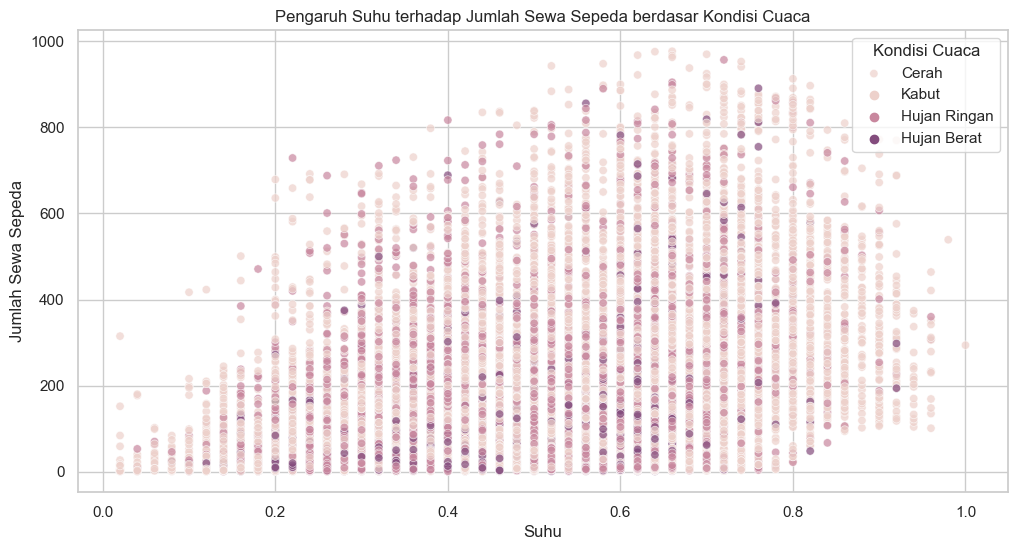

In [23]:
#mengatur style untuk visualisasi
sns.set(style="whitegrid")

#memvisualisasikan jumlah sewa sepeda berdasar suhu
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hour_df, x='temp', y='cnt', hue='weathersit', alpha=0.7)
plt.title('Pengaruh Suhu terhadap Jumlah Sewa Sepeda berdasar Kondisi Cuaca')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right', labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

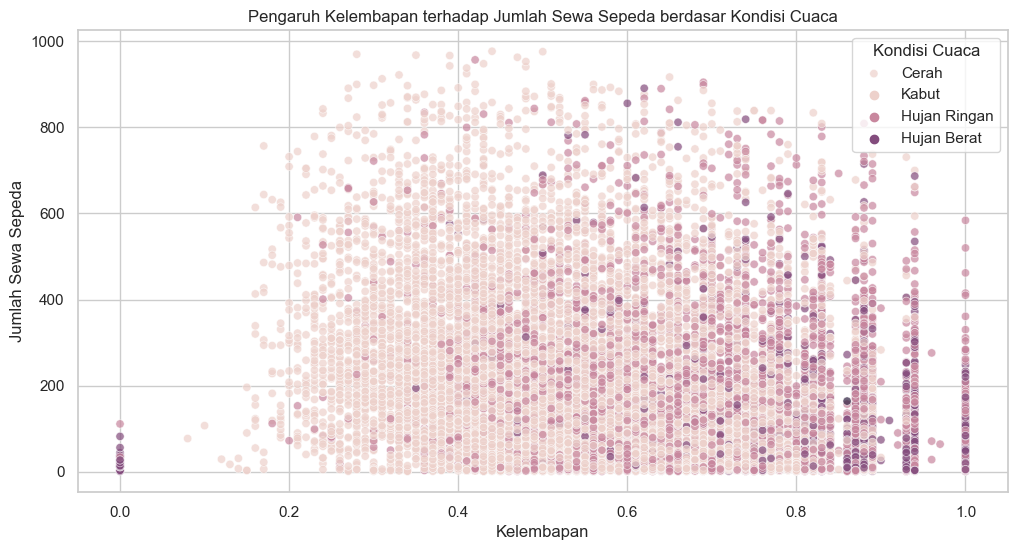

In [24]:
#memvisualisasikan jumlah sewa sepeda berdasar kelembapan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hour_df, x='hum', y='cnt', hue='weathersit', alpha=0.7)
plt.title('Pengaruh Kelembapan terhadap Jumlah Sewa Sepeda berdasar Kondisi Cuaca')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Sewa Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right', labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

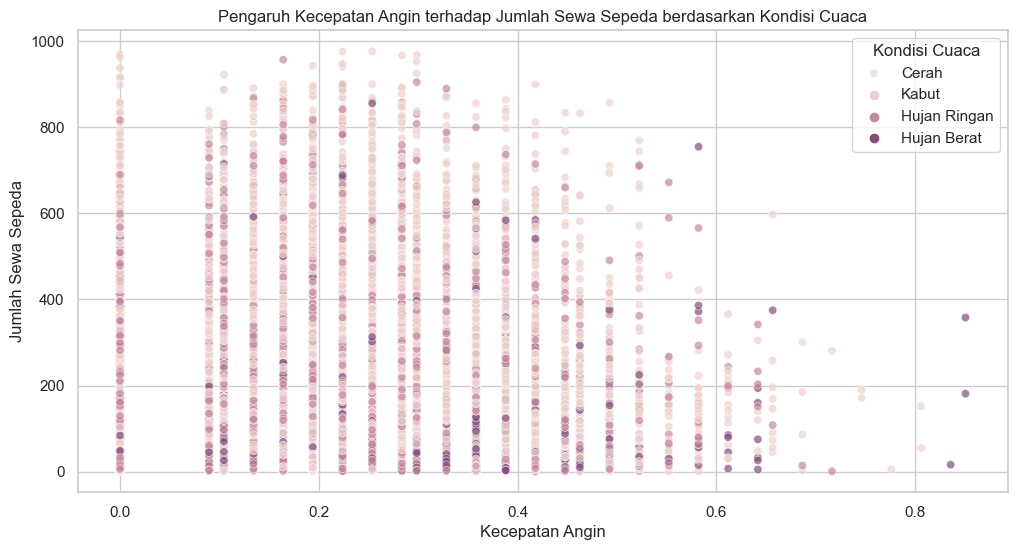

In [25]:
#memvisualisasikan jumlah sewa sepeda berdasar kecepatan angin
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hour_df, x='windspeed', y='cnt', hue='weathersit', alpha=0.7)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Sewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sewa Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right', labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.show()

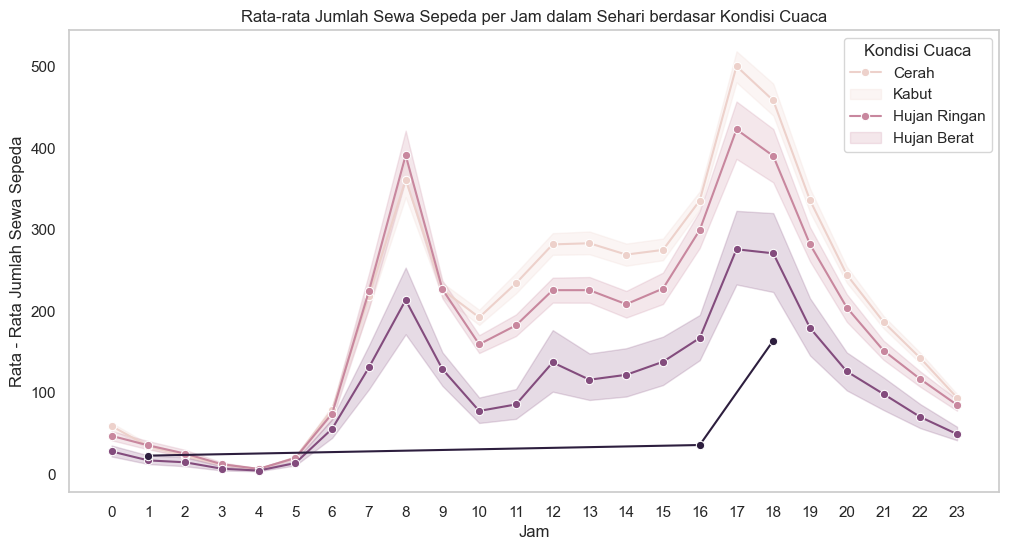

In [26]:
#memvisualisasikan jumlah sewa sepeda berdasar jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weathersit', estimator='mean', marker='o')
plt.title('Rata-rata Jumlah Sewa Sepeda per Jam dalam Sehari berdasar Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Jumlah Sewa Sepeda')
plt.legend(title='Kondisi Cuaca', loc='upper right', labels=['Cerah', 'Kabut', 'Hujan Ringan', 'Hujan Berat'])
plt.xticks(range(0, 24))
plt.grid()
plt.show()

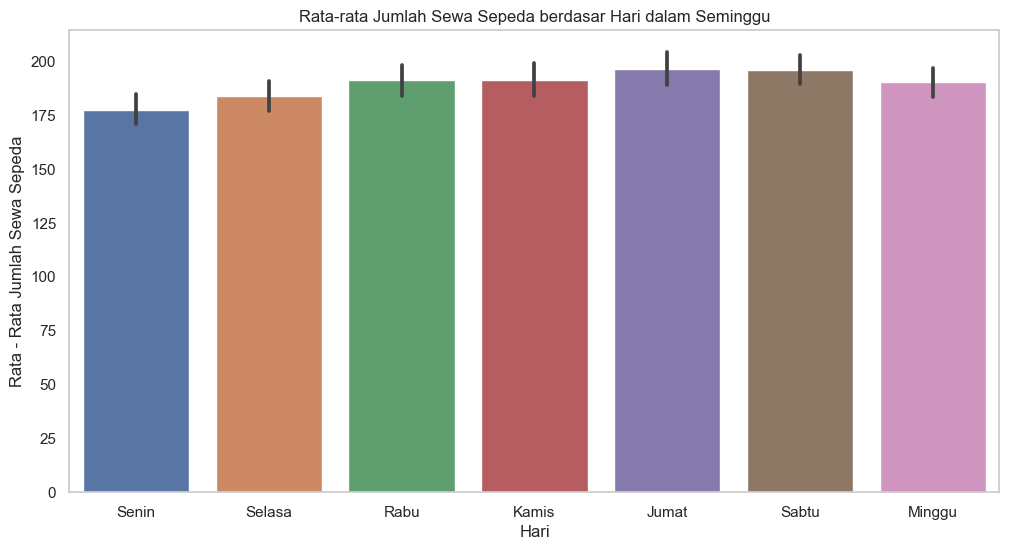

In [27]:
#memvisualisasikan jumlah sewa sepeda berdasar hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_df, x='weekday', y='cnt', estimator='mean')
plt.title('Rata-rata Jumlah Sewa Sepeda berdasar Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata - Rata Jumlah Sewa Sepeda')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.grid(axis='y')
plt.show()

### Pertanyaan 2: Bagaimana perbedaan jumlah sewa sepeda antara Working Day dan Weekend?

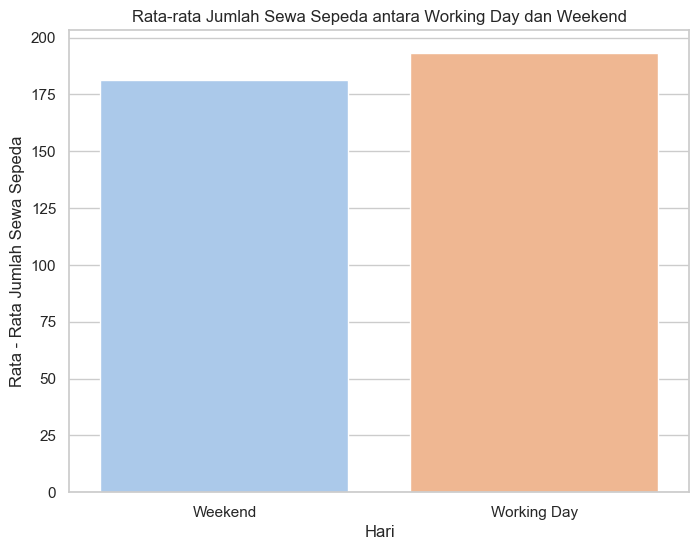

In [28]:
#mengatur style untuk visualisasi
sns.set(style="whitegrid")

#menghitung rata - rata jumlah sewa sepeda berdasar kategori working day dan weekend
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend')

#menghitung rata - rata jumlah sewa sepeda berdasar jenis hari
rata_sewa = hour_df.groupby('day_type')['cnt'].mean().reset_index()

#memvisualisasikan jumlah sewa sepeda berdasar working day dan weekend
plt.figure(figsize=(8, 6))
sns.barplot(data=rata_sewa, x='day_type', y='cnt', palette='pastel')
plt.title('Rata-rata Jumlah Sewa Sepeda antara Working Day dan Weekend')
plt.xlabel('Hari')
plt.ylabel('Rata - Rata Jumlah Sewa Sepeda')
plt.ylim(0, rata_sewa['cnt'].max() + 10)  #menambahkan space atas
plt.show()

**Insight:**
- Dari visualisasi data didapatkan bahwa faktor yang mempengaruhi jumlah sewa sepeda pada hari tertentu adalah suhu, kelembapan, kecepatan angin, jam sewa, dan hari.
- Rata - rata jumlah sewa sepeda lebih tinggi pada Working Day.

## Analisis Lanjutan (Opsional)

             monetary  recency
customer_id                   
13                 16      730
45                 40      730
72                 32      730
82                 13      730
83                  1      730
             monetary  recency  frequency
customer_id                              
13                 16      730          1
45                 40      730          1
72                 32      730          1
82                 13      730          1
83                  1      730          1
           monetary       recency     frequency
count  17355.000000  17355.000000  17355.000000
mean     189.725094    363.544454      1.001383
std      181.376082    209.995670      0.038682
min        1.000000      0.000000      1.000000
25%       40.000000    182.000000      1.000000
50%      142.000000    363.000000      1.000000
75%      281.000000    545.000000      1.000000
max      977.000000    730.000000      3.000000


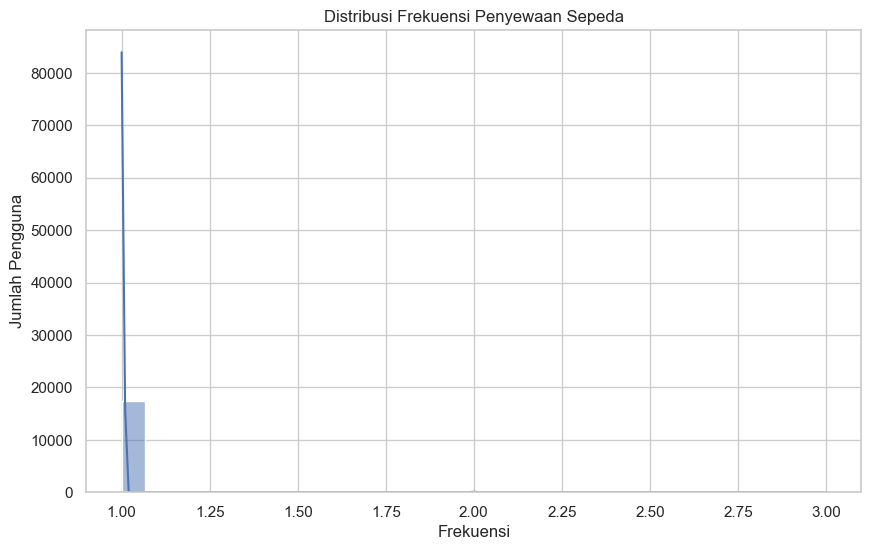

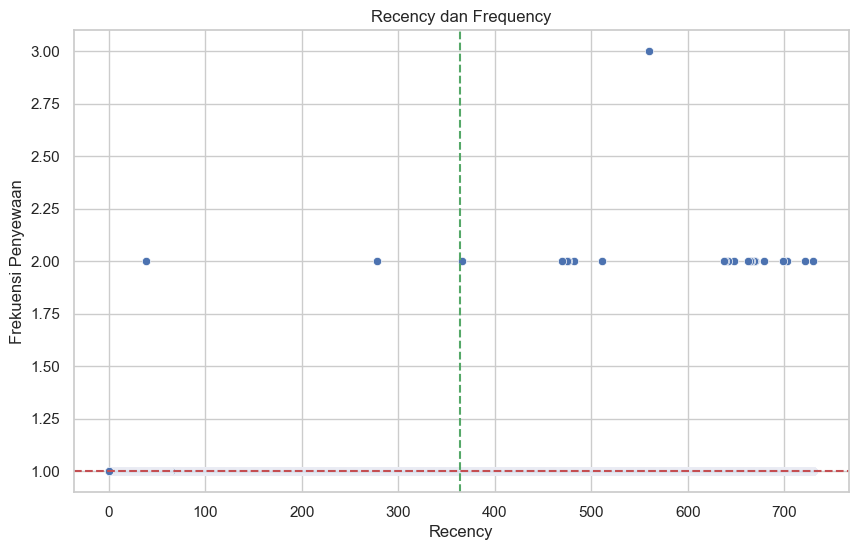

In [29]:
#RFM analysis

#mengubah kolom dteday mjd tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#menggunakan kolom cnt untuk monetary value
#menciptakan customer_id berdasar registered users

#menambahkan customer_id
hour_df['customer_id'] = hour_df['registered'].cumsum()

#menyiapkan dataframe untuk RFM
rfm_df = hour_df.groupby('customer_id').agg({
    'dteday': 'max',  #ambil tanggal penyewaan terakhir
    'cnt': 'sum'      #hitung total penyewaan
})

#mengganti nama kolom
rfm_df.columns = ['last_rental_date', 'monetary']

#menghitung Recency
recent_date = hour_df['dteday'].max()
rfm_df['recency'] = (recent_date - rfm_df['last_rental_date']).dt.days

#menghapus kolom yang tdk dibutuhkan
rfm_df.drop('last_rental_date', axis=1, inplace=True)

#menampilkan hasil RFM
print(rfm_df.head())

#menghitung Frequency
rfm_df['frequency'] = hour_df.groupby('customer_id')['cnt'].count().values

#menampilkan hasil RFM
print(rfm_df.head())

#menampilkan ringkasan RFM
print(rfm_df.describe())

#memvisualisasikan distribusi frekuensi
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['frequency'], bins=30, kde=True)
plt.title('Distribusi Frekuensi Penyewaan Sepeda')
plt.xlabel('Frekuensi')
plt.ylabel('Jumlah Pengguna')
plt.show()

#memvisualisasikan Recency dan Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='recency', y='frequency')
plt.title('Recency dan Frequency')
plt.xlabel('Recency')
plt.ylabel('Frekuensi Penyewaan')
plt.axhline(y=rfm_df['frequency'].mean(), color='r', linestyle='--')
plt.axvline(x=rfm_df['recency'].mean(), color='g', linestyle='--')
plt.show()

**Insight:**
- Dari analisis lanjutan dapat dilihat penyewa mana yang sering menyewa sepeda, mengetahui berapa lama penyewa tidak melakukan sewa, dan mengetahui banyak pengguna menyewa.

## Conclusion

- Faktor - faktor yang mempengaruhi jumlah sewa sepeda pada hari tertentu adalah suhu, kelembapan, kecepatan angin, jam sewa, dan hari.
- Jumlah sewa sepeda antara Working Day lebih tinggi dibandingkan dengan Weekend.